## Section A: Model Complexity and Model Selection
In this section, you study the effect of model complexity on the training and testing error. You also demonstrate your programming skills by developing a regression algorithm and a cross-validation technique that will be used to select
the models with the most effective complexity.



### Question 1: KNN Regressor
> ##### 1. Implement the KNN regressor function :

In [53]:
#libraries
library(ggplot2)
library(reshape2)

In [54]:
#reading the datasets
train_data <- read.csv(file="Task1A_train.csv", header=TRUE, sep=",")
test_data <- read.csv(file="Task1A_test.csv", header=TRUE, sep=",")

In [55]:
#breaking the dataset in to train and test label,data
train.data <- train_data[1:nrow(train_data),-2] # grab the first 42 records, leave out the label (last column)
train.label <- train_data[1:nrow(train_data),2]
test.data <- test_data[1:nrow(test_data), -2] # grab the last 42 records, leave out the label (last column)
test.label <- test_data[1:nrow(test_data), 2]

In [56]:
#knn regressor function
knn <- function(train.data, train.label, test.data, K=4, distance = 'euclidean'){
    ## count number of train samples
    train.len <- length(train.data)
    ## count number of test samples
    test.len <- length(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(c(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample...
    for (i in 1:train.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted labels according to the majority vote
        test.label[i]<- (mean(train.label[nn]))
        
    }
    
    ## return the class labels as output
    return (test.label)
}

In [57]:
# calculate the train and test missclassification rates for K in 1:42
miss <- data.frame('K'=1:20, 'train'=rep(0,20), 'test'=rep(0,20))
for (k in 1:20){
    miss[k,'train'] <- sqrt(mean((knn(train.data, train.label, train.data, K=k)- train.label)^2))
    miss[k,'test'] <-  sqrt(mean((knn(train.data, train.label, test.data, K=k) - test.label)^2))
}

> ##### 2. Plot the training and testing error verus 1/K for K=1,...20

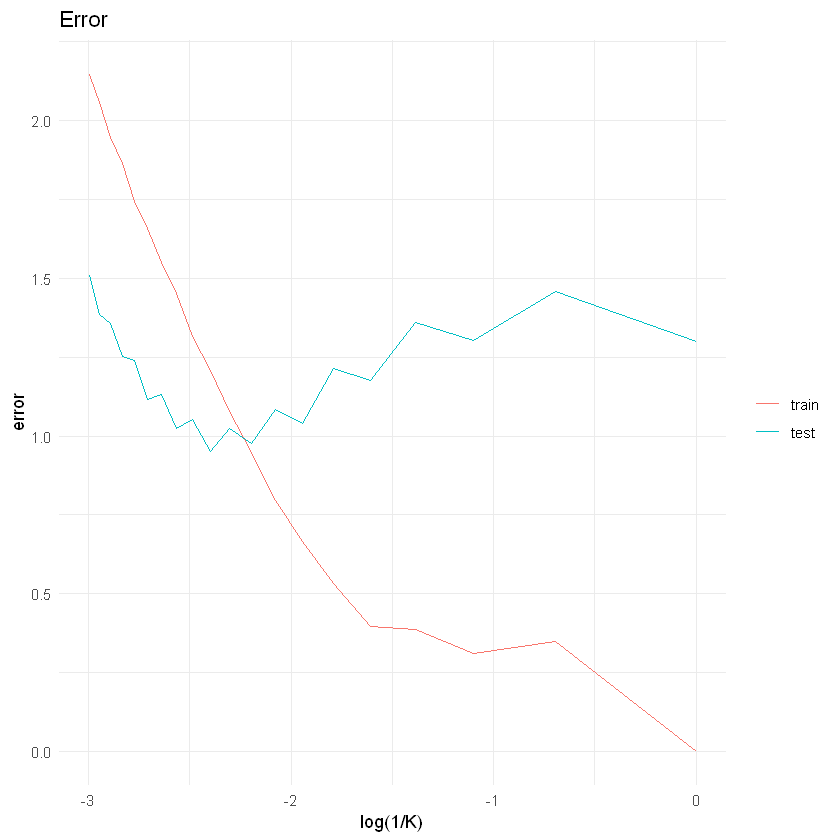

In [67]:
miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
ggplot(data=miss.m, aes(x=log(1/K), y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Error")

> ##### 3. Report optimum value for K.
> * Observing the following table and the plot above, we can claim that K = 9 and 11 is the optimum value where the testing error is the least.
> * Choosing the optimum value for K is very crucial, since if not, we can face problems like underfitting and over fitting.
If we were to choose K which gives lowest training error, then we cannot use the model to predict values for a new dataset, because it would give us high variance, and on the other hand if we choose a K which gives us low test error then, it would give us high bias towards the training error.
> * Hence we have chosen a optimum value, tolerating some bias we can avoid high variance and hence at K =10 we get the optimum value. 

In [66]:
library(plyr)
head(arrange(miss,(test),K))

K,train,test
11,1.2087154,0.9527024
9,0.9474979,0.9770276
10,1.0768843,1.0227636
13,1.4509316,1.0243344
7,0.6645726,1.0388807
12,1.3171023,1.0531665
